In [3]:
# Import the pandas and numpy libraries
import pandas as pd
import numpy as np

# Load and preview the dataset
df1 = pd.read_csv('/Users/manan/Downloads/AOT/Module 4/Module4_assignment_dataset.csv')
df1.head()

,id,flight,departure_time,stops,arrival_time,duration,departure_region,destination_region,class,airline,price
0,0,SG-8709,Evening,zero,Night,1.98,Europe,Europe,Ecomomy,Qatar Airline,3242.03
1,1,SG-8157,Early_Morning,zero,Morning,8.06,Africa,South America,Ecomomy,Delta Airlines,5209.48
2,2,I5-764,Early_Morning,zero,Early_Morning,4.24,Europe,Europe,Ecomomy,Turkish Airlines,1543.05
3,3,UK-995,Morning,zero,Afternoon,7.43,North America,Europe,Ecomomy,Delta Airlines,6970.84
4,4,UK-963,Morning,zero,Morning,7.62,Middle East,North America,Ecomomy,United Airlines,2211.37


In [37]:
# Find the minimum price
min_price = df1['price'].min()

# Applying the log transformation
df1['log_price'] = np.log(df1['price'])

# Shows the rows of the dataframe with original and log-transformed prices
df1[['price', 'log_price']].head()

,price,log_price
0,3242.03,8.083955
1,5209.48,8.558235
2,1543.05,7.341516
3,6970.84,8.849491
4,2211.37,7.701368


In [11]:
# Display value counts for 'departure_time', 'class', and 'airline'

# Count occurrences of each departure time
print("Departure Time Counts:")
# Prints the count of each departure time
print(df1['departure_time'].value_counts())

# Count occurrences of each class
print("\nClass Counts:")
# Prints the count of each class
print(df1['class'].value_counts())

# Count occurrences of each airline
print("\nAirline Counts:")
# Prints the count of each airline
print(df1['airline'].value_counts())

Departure Time Counts:
Evening          12649
Morning          11415
Early_Morning    10734
Afternoon         9067
Night             5685
Late_Night         450
Name: departure_time, dtype: int64

Class Counts:
Ecomomy     41671
Business     6287
First        2042
Name: class, dtype: int64

Airline Counts:
Delta Airlines       12560
United Airlines       9952
Qatar Airline         7584
American Airlines     7334
Turkish Airlines      5066
Emirates airline      4919
British Airways       2585
Name: airline, dtype: int64


In [10]:
# Identify the categorical columns to dummy code
categorical_columns = ['departure_time', 'stops', 'departure_region', 'destination_region', 'class', 'airline']

# Apply dummy coding to above columns
df1_dummies = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

# Display the rows of the transformed dataset
df1_dummies.head()

,id,flight,arrival_time,duration,price,log_price,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,...,destination_region_South America,destination_region_South East Asia,class_Ecomomy,class_First,airline_British Airways,airline_Delta Airlines,airline_Emirates airline,airline_Qatar Airline,airline_Turkish Airlines,airline_United Airlines
0,0,SG-8709,Night,1.98,3242.03,8.084263,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,SG-8157,Morning,8.06,5209.48,8.558427,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,2,I5-764,Early_Morning,4.24,1543.05,7.342164,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,UK-995,Afternoon,7.43,6970.84,8.849634,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,4,UK-963,Morning,7.62,2211.37,7.701820,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [33]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

pc1 = iris.data
pc2 = iris.target

# Apply PCA
pca = PCA(n_components=2)
pc1_x = pca.fit_transform(pc1)

# Visualizations of df
df_pca = pd.DataFrame(data = pc1_x, columns = ['PC1', 'PC2'])
df_pca['Target'] = pc2

df_pca.head()

,PC1,PC2,Target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


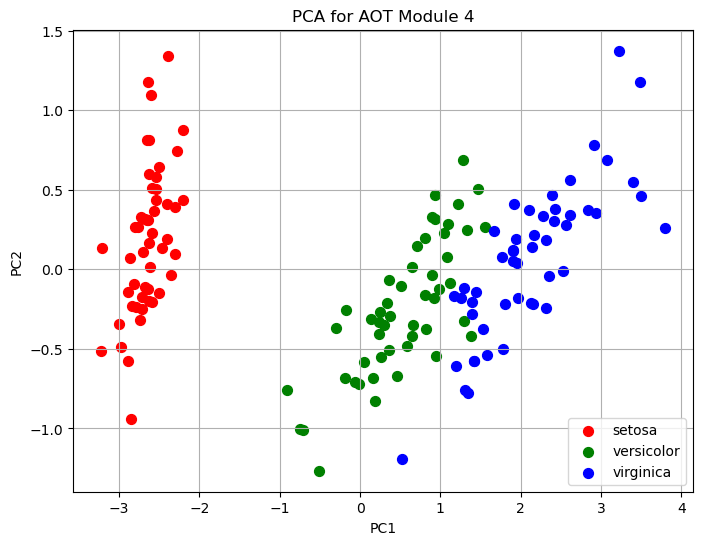

In [31]:
# Visualize the data
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
targets = [0,1,2]
labels = iris.target_names

for target, color, label in zip(targets, colors, labels):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'],
               df_pca.loc[indices_to_keep, 'PC2'],
               c=color, s=50, label=label)

plt.title('PCA for AOT Module 4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()

plt.show()